In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/diamonds/diamonds.csv


In [3]:
# Importing the dataset
df = pd.read_csv('../input/diamonds/diamonds.csv')

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#dropping the first column
df.drop(columns="Unnamed: 0", inplace= True)


In [ ]:
df.head()

In [5]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [6]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [7]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [8]:
import seaborn as sns

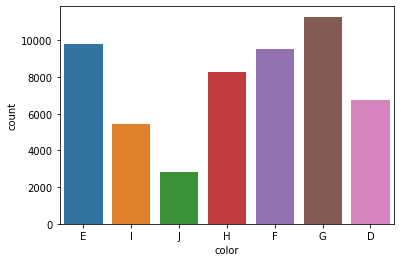

In [9]:
sns.countplot(x="color", data=df)

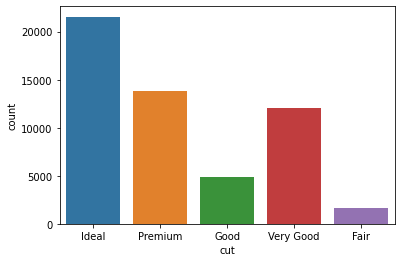

In [10]:
sns.countplot(x="cut", data=df)

In [12]:
#labelling the datasets features categorical labels by dictionary numerical mappings
cut_dict = {"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5}
color_dict = {'E' : 1, 'I' : 2, 'J' : 3, 'H' : 4, 'F' : 5, 'G' : 6, 'D' : 7}
clarity_dict = {'SI2' : 1, 'SI1' : 2, 'VS1' : 3, 'VS2' : 4, 'VVS2' : 5, 'VVS1' : 6, 'I1' :7, 'IF' : 8}

df["cut"] = df["cut"].map(cut_dict)
df["color"] = df["color"].map(color_dict)
df["clarity"] = df["clarity"].map(clarity_dict)

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,3,1,63.3,58.0,335,4.34,4.35,2.75


In [14]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [15]:
#creating predictors and dependent vector
X = df.drop("price", axis = 1).values
y = df["price"].values

In [16]:
X


array([[0.23, 5.  , 1.  , ..., 3.95, 3.98, 2.43],
       [0.21, 4.  , 1.  , ..., 3.89, 3.84, 2.31],
       [0.23, 2.  , 1.  , ..., 4.05, 4.07, 2.31],
       ...,
       [0.7 , 3.  , 7.  , ..., 5.66, 5.68, 3.56],
       [0.86, 4.  , 4.  , ..., 6.15, 6.12, 3.74],
       [0.75, 5.  , 7.  , ..., 5.83, 5.87, 3.64]])

In [17]:
y

array([ 326,  326,  327, ..., 2757, 2757, 2757])

In [18]:
#splitting test and train set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)


In [19]:
#fitting model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [20]:
regressor.score(X_test, y_test)

0.9782022924323266

In [21]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)


In [22]:
accuracies

array([0.97743854, 0.97793786, 0.97541695, 0.97663652, 0.97632184,
       0.97864913, 0.97996328, 0.98069842, 0.97556849, 0.9778993 ])

In [ ]:
accuracies.mean()